In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [4]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [5]:
train.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [6]:
test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [7]:
test.isnull().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
Month_SeasonalPurchase             58
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
CustomerType                       88
Gender                             64
Cookies Setting                    62
Education                          69
Marital Status                     47
WeekendPurchase                    58
dtype: int64

In [8]:
train.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
Made_Purchase                         bool
dtype: object

In [9]:
train.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   object 
 11  OS                               6537 non-null   float64
 12  SearchEngine        

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

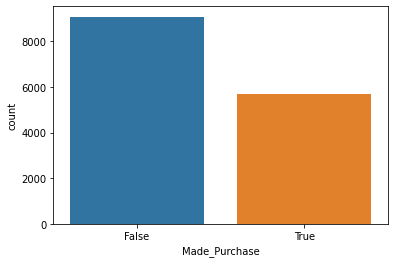

In [12]:
#FOR Categorical Feature
sns.countplot(train['Made_Purchase'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

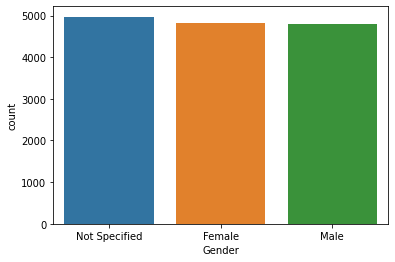

In [13]:
 sns.countplot(train['Gender'])

<AxesSubplot:xlabel='Cookies Setting', ylabel='count'>

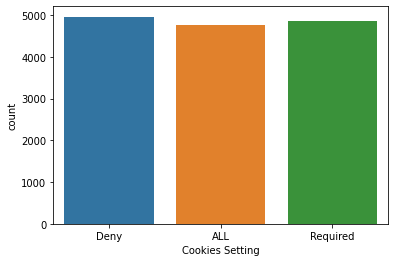

In [14]:
sns.countplot(train['Cookies Setting'])

<AxesSubplot:xlabel='Education', ylabel='count'>

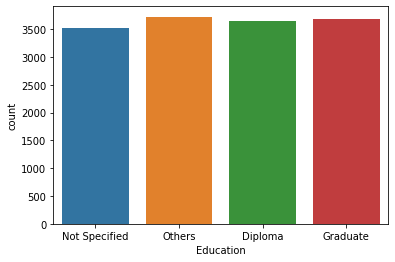

In [15]:
sns.countplot(train['Education'])

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

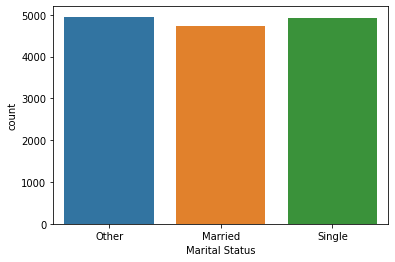

In [16]:
sns.countplot(train['Marital Status'])

<AxesSubplot:xlabel='Month_SeasonalPurchase', ylabel='count'>

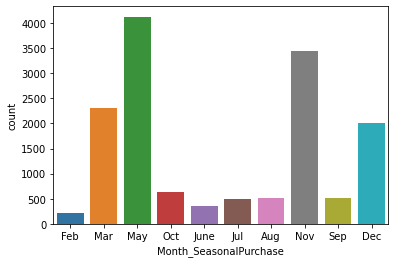

In [17]:
sns.countplot(train['Month_SeasonalPurchase'])

<AxesSubplot:xlabel='HomePage', ylabel='Density'>

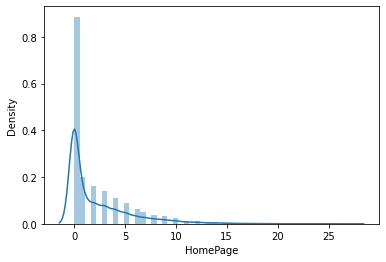

In [18]:
#For Numerical Attribute
sns.distplot(train['HomePage'])

<AxesSubplot:xlabel='HomePage_Duration', ylabel='Density'>

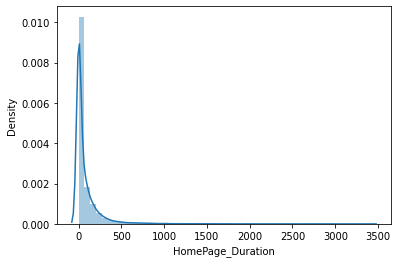

In [19]:
sns.distplot(train['HomePage_Duration'])

<AxesSubplot:xlabel='LandingPage', ylabel='Density'>

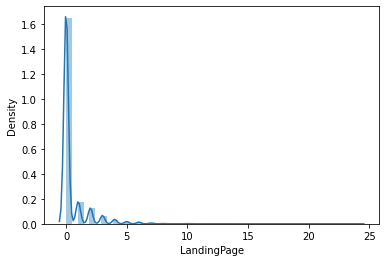

In [20]:
sns.distplot(train['LandingPage'])

<AxesSubplot:xlabel='LandingPage_Duration', ylabel='Density'>

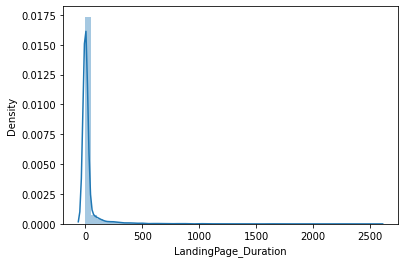

In [21]:
sns.distplot(train['LandingPage_Duration'])

<AxesSubplot:xlabel='ProductDescriptionPage', ylabel='Density'>

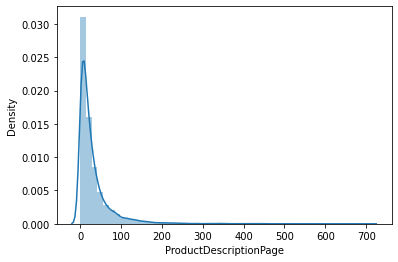

In [22]:
sns.distplot(train['ProductDescriptionPage'])

<AxesSubplot:xlabel='ProductDescriptionPage_Duration', ylabel='Density'>

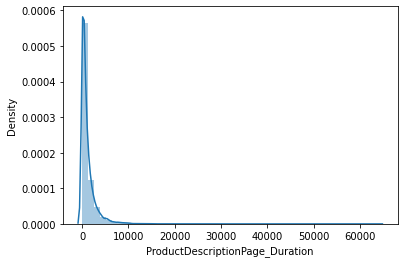

In [23]:
sns.distplot(train['ProductDescriptionPage_Duration'])

<AxesSubplot:xlabel='GoogleMetric:Bounce Rates', ylabel='Density'>

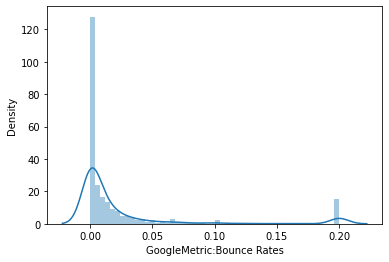

In [24]:
sns.distplot(train['GoogleMetric:Bounce Rates'])

<AxesSubplot:xlabel='GoogleMetric:Exit Rates', ylabel='Density'>

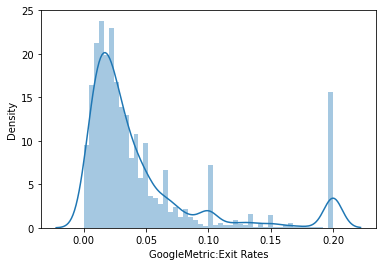

In [25]:
sns.distplot(train['GoogleMetric:Exit Rates'])

<AxesSubplot:xlabel='SeasonalPurchase', ylabel='Density'>

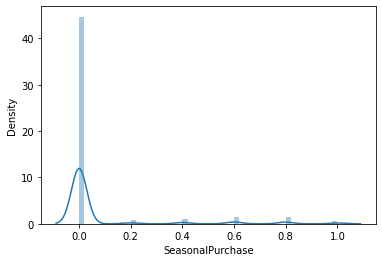

In [26]:
sns.distplot(train['SeasonalPurchase'])

<AxesSubplot:xlabel='GoogleMetric:Page Values', ylabel='Density'>

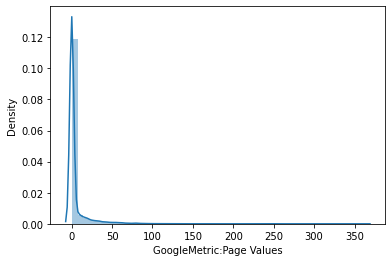

In [27]:
sns.distplot(train['GoogleMetric:Page Values'])

In [28]:
train_len=len(train)
#Combine two dataframes
df=pd.concat([train,test],axis=0)
df=df.reset_index(drop=True)
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [29]:
df.tail()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
21325,0.0,0.000000,0.0,0.0,7.0,208.000000,0.000000,0.028571,0.0,0.0,...,1.0,1.0,5.0,Returning_Visitor,Not Specified,Required,Graduate,Other,1.0,NaN
21326,0.0,0.000000,3.0,44.0,179.0,1738.472529,0.000027,0.025998,0.0,0.0,...,4.0,9.0,11.0,Returning_Visitor,Male,Required,Not Specified,Other,0.0,NaN
21327,5.0,99.166667,1.0,27.0,33.0,NaN,0.002778,0.009127,0.0,0.6,...,5.0,1.0,2.0,Returning_Visitor,Female,Required,Graduate,Married,0.0,NaN
21328,0.0,0.000000,0.0,0.0,3.0,9.000000,0.066667,0.133333,0.0,0.0,...,2.0,2.0,3.0,Returning_Visitor,Not Specified,Deny,Diploma,Other,1.0,NaN
21329,0.0,0.000000,0.0,0.0,6.0,313.000000,0.000000,0.050000,0.0,0.0,...,4.0,3.0,1.0,Returning_Visitor,Male,Required,Diploma,Single,0.0,NaN


In [30]:
df.isnull().sum()

HomePage                            204
HomePage_Duration                   205
LandingPage                         209
LandingPage_Duration                210
ProductDescriptionPage              181
ProductDescriptionPage_Duration     230
GoogleMetric:Bounce Rates           217
GoogleMetric:Exit Rates             180
GoogleMetric:Page Values            177
SeasonalPurchase                    195
Month_SeasonalPurchase              202
OS                                  196
SearchEngine                        180
Zone                                164
Type of Traffic                     211
CustomerType                        232
Gender                              209
Cookies Setting                     206
Education                           205
Marital Status                      177
WeekendPurchase                     179
Made_Purchase                      6599
dtype: int64

In [31]:
#Fill missing value of numerical column by mean
df['HomePage']=df['HomePage'].fillna(df['HomePage'].median())
df['HomePage_Duration']=df['HomePage_Duration'].fillna(df['HomePage_Duration'].median())
df['LandingPage']=df['LandingPage'].fillna(df['LandingPage'].median())
df['LandingPage_Duration']=df['LandingPage_Duration'].fillna(df['LandingPage_Duration'].median())
df['ProductDescriptionPage']=df['ProductDescriptionPage'].fillna(df['ProductDescriptionPage'].median())                                              
df['ProductDescriptionPage_Duration']=df['ProductDescriptionPage_Duration'].fillna(df['ProductDescriptionPage_Duration'].median())
df['GoogleMetric:Bounce Rates']=df['GoogleMetric:Bounce Rates'].fillna(df['GoogleMetric:Bounce Rates'].median())                                              
df['GoogleMetric:Exit Rates']=df['GoogleMetric:Exit Rates'].fillna(df['GoogleMetric:Exit Rates'].median())                                           
df['GoogleMetric:Page Values']=df['GoogleMetric:Page Values'].fillna(df['GoogleMetric:Page Values'].median())
df['SeasonalPurchase']=df['SeasonalPurchase'].fillna(df['SeasonalPurchase'].median())
df['OS']=df['OS'].fillna(df['OS'].median())
df['SearchEngine']=df['SearchEngine'].fillna(df['SearchEngine'].median())
df['Zone']=df['Zone'].fillna(df['Zone'].median())
df['Type of Traffic']=df['Type of Traffic'].fillna(df['Type of Traffic'].median())  
df['WeekendPurchase']=df['WeekendPurchase'].fillna(df['WeekendPurchase'].median()) 

In [32]:
#Fill missing value of categorical column by mode
df['Month_SeasonalPurchase']=df['Month_SeasonalPurchase'].fillna(df['Month_SeasonalPurchase'].mode()[0])
df['CustomerType']=df['CustomerType'].fillna(df['CustomerType'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Cookies Setting']=df['Cookies Setting'].fillna(df['Cookies Setting'].mode()[0])
df['Education']=df['Education'].fillna(df['Education'].mode()[0])
df['Marital Status']=df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['Made_Purchase']=df['Made_Purchase'].fillna(df['Made_Purchase'].mode()[0])                                             

In [33]:
df.isnull().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Made_Purchase                      0
dtype: int64

<AxesSubplot:>

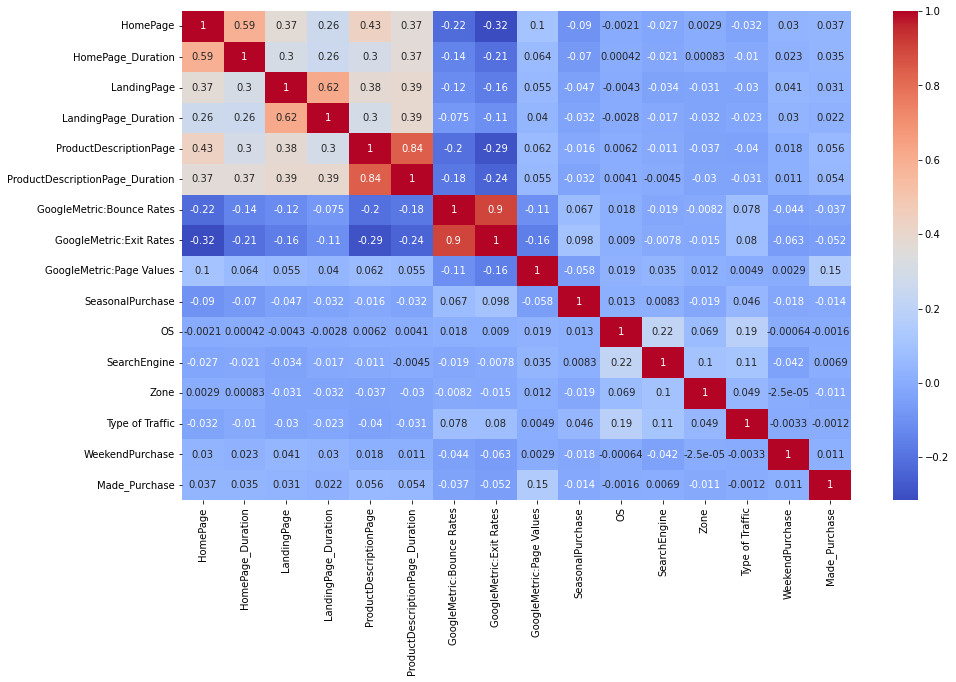

In [34]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [35]:
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [36]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
cols=['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education',
     'Marital Status']
le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,2,2,1,2,1,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,2,0,1,3,0,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,2,0,0,3,0,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,2,1,0,0,2,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,2,1,1,0,1,1.0,False


In [37]:
#Train-test-Split
train=df.iloc[:train_len, :]
test=df.iloc[train_len:, :]

In [38]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,2,2,1,2,1,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,2,0,1,3,0,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,2,0,0,3,0,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,2,1,0,0,2,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,2,1,1,0,1,1.0,False


In [39]:
train['Made_Purchase']

0        False
1        False
2        False
3        False
4        False
         ...  
14726     True
14727     True
14728     True
14729     True
14730     True
Name: Made_Purchase, Length: 14731, dtype: bool

In [40]:
test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
14731,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,2,2,1,2,2,0.0,False
14732,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,1.0,2.0,2,2,0,1,0,0.0,False
14733,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,1.0,3.0,2,0,2,0,1,0.0,False
14734,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,3.0,2,2,2,1,1,0.0,False
14735,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,4.0,3.0,2,0,1,3,1,0.0,False


In [41]:
#Input Split
X=train.drop(columns=['Made_Purchase'],axis=1)
Y=train['Made_Purchase']

In [42]:
X.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,4.0,1.0,9.0,3.0,2,2,1,2,1,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3.0,2.0,2.0,4.0,2,0,1,3,0,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,3.0,1.0,4.0,2,0,0,3,0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,2.0,4.0,3.0,3.0,2,1,0,0,2,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,2.0,1.0,5.0,2,1,1,0,1,1.0


In [43]:
#Model Training
from sklearn.model_selection import train_test_split,cross_val_score

def classify(model):
    X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.25,random_state=42)
    model.fit(X_train,Y_train)
    print('Accuracy:',model.score(X_test,Y_test))
    
    score=cross_val_score(model,X,Y,cv=5)
    print('CV score',np.mean(score))

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Accuracy: 0.6668476785229432
CV score 0.6371535967745168


In [45]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy: 0.4670105891935922
CV score 0.3977989974961592


In [46]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Accuracy: 0.5229432527830573
CV score 0.41646925509758165


In [47]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
classify(model)

Accuracy: 0.5272875373336954
CV score 0.4240057489971621


In [48]:
from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

Accuracy: 0.5951669834374151
CV score 0.3973260805113005


In [49]:
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(verbose=0)
# classify(model)

In [50]:
#Complete Model Training
model=LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [51]:
test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
14731,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,2,2,1,2,2,0.0,False
14732,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,1.0,2.0,2,2,0,1,0,0.0,False
14733,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,1.0,3.0,2,0,2,0,1,0.0,False
14734,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,3.0,2,2,2,1,1,0.0,False
14735,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,4.0,3.0,2,0,1,3,1,0.0,False


In [52]:
X_test=test.drop(columns=['Made_Purchase'],axis=1)

In [53]:
X_test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
14731,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,2,2,1,2,2,0.0
14732,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,2,2,0,1,0,0.0
14733,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,2,0,2,0,1,0.0
14734,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,2,2,2,1,1,0.0
14735,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,2,0,1,3,1,0.0


In [54]:
prediction = model.predict(X_test)
prediction_df=pd.DataFrame(prediction)
prediction_df.describe()

,0
count,6599
unique,2
top,False
freq,5974


In [55]:
submission = pd.DataFrame(columns=['id','Made_Purchase'])
submission['id'] = [i for i in range(len(prediction))]
submission['Made_Purchase'] = prediction
submission.to_csv('submission.csv',index=False)

In [56]:
a=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv')
a

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
6594,6594,False
6595,6595,False
6596,6596,False
6597,6597,False


In [57]:
submission.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
